In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [9]:
%run classes/music.py

In [15]:
music = Music()
music.read('sounds/wav/cello_pluck/expert/d3a3_copy6.wav')
notes = music.compile_music(window=3000, DIFF=3000)
len(notes)

1

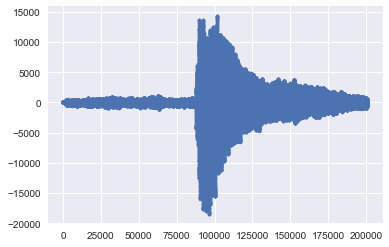

In [16]:
plt.plot(music.chan1, ".")

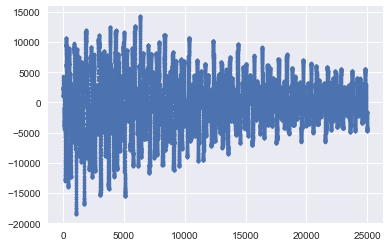

In [17]:
stub = music.chan1[95000:120000]
plt.plot(stub, ".")

(0, 1000)

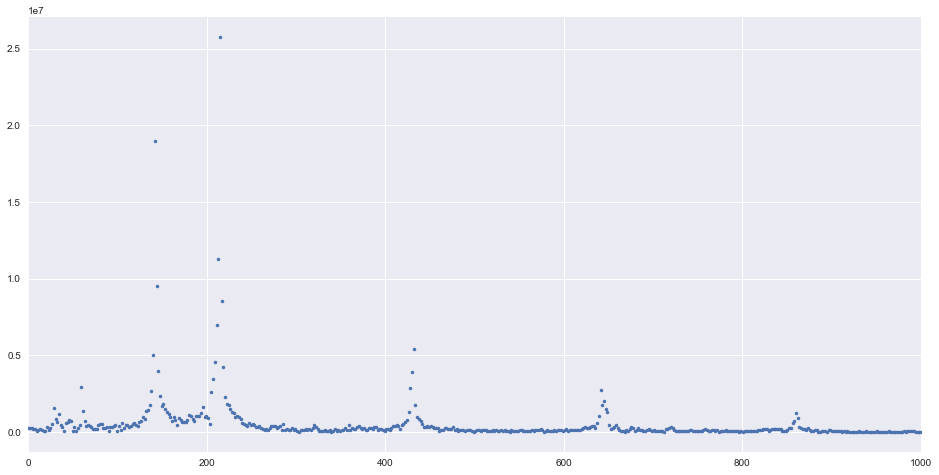

In [14]:
from scipy.fftpack import fft

fft_data = np.abs(fft(stub))

conversion_factor = music.sample_rate / len(fft_data)
x = [i * conversion_factor for i in range(len(fft_data))]

plt.figure(figsize=(16,8))
plt.plot(x, fft_data, ".")
plt.xlim(0, 1000)

# plt.axvline(65.4, color="k")
# plt.axvline(98, color="k")
# plt.axvline(146, color="k", linewidth=1)
# # plt.axvline(420, color="k")
# _ = plt.axvline(220, color="k")

In [10]:
music.save("/Users/pbezuhov/Desktop/output.xml")

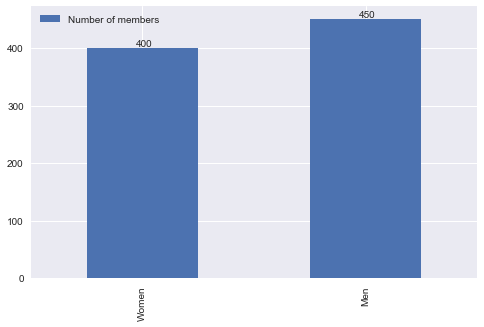

In [34]:
import pandas as pd

ax = pd.DataFrame({"Number of members": [400, 450]}, index=["Women", "Men"]).plot(kind="bar", figsize=(8, 5))

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.22, p.get_height() * 1.01))